In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path 
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2, DenseNet121, Xception, VGG16 
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from keras import Sequential
import random

In [2]:
data_dir = '/Users/akashzamnani/datasets/Grapevine_Leaves_Image_Dataset'

print('training ds')

train_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=.2,
    subset='training',
    image_size=(256,256),
    seed=123,
    batch_size=32
)

print('validation ds')

validation_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=.2,
    seed = 123,
    subset='validation',
    image_size=(256,256),
    batch_size=32
)

training ds
Found 500 files belonging to 5 classes.
Using 400 files for training.
validation ds
Found 500 files belonging to 5 classes.
Using 100 files for validation.


In [18]:
train_ds = train_ds.map(lambda x,y:(x/255.0,y))
validation_ds = validation_ds.map(lambda x, y: (x/255.0,y))

In [19]:
def visualize_images(path, no_of_images=5):
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    
    if not image_filenames:
        raise ValueError("NO images found for specific path")
        
    selected_images = random.sample(image_filenames,min(no_of_images,len(image_filenames)))
    fig, axes = plt.subplots(1, no_of_images, figsize=(15, 3),facecolor = 'white')
    
    for i,image_filename in enumerate(selected_images):
        image_path = os.path.join(path,image_filename)
        image = plt.imread(image_path)
        
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)
    plt.tight_layout()
    plt.show()
    
    

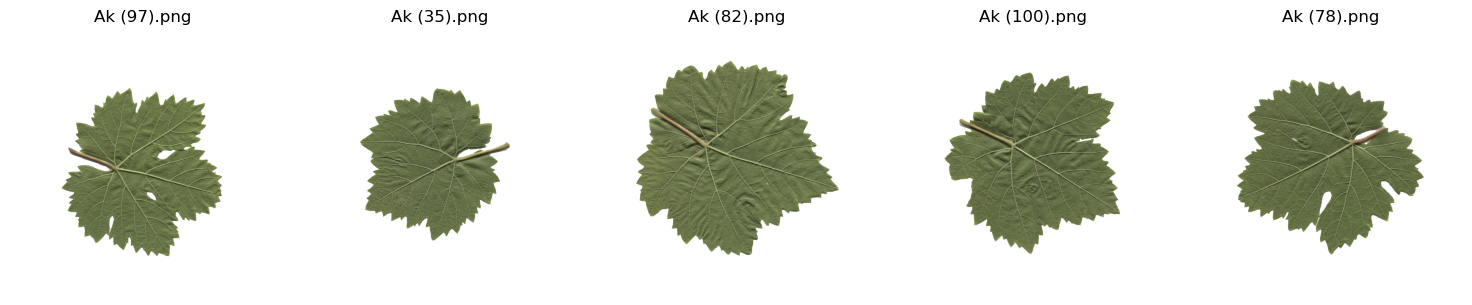

In [20]:
path_to_visualize = '/Users/akashzamnani/datasets/Grapevine_Leaves_Image_Dataset/Ak'

visualize_images(path=path_to_visualize)

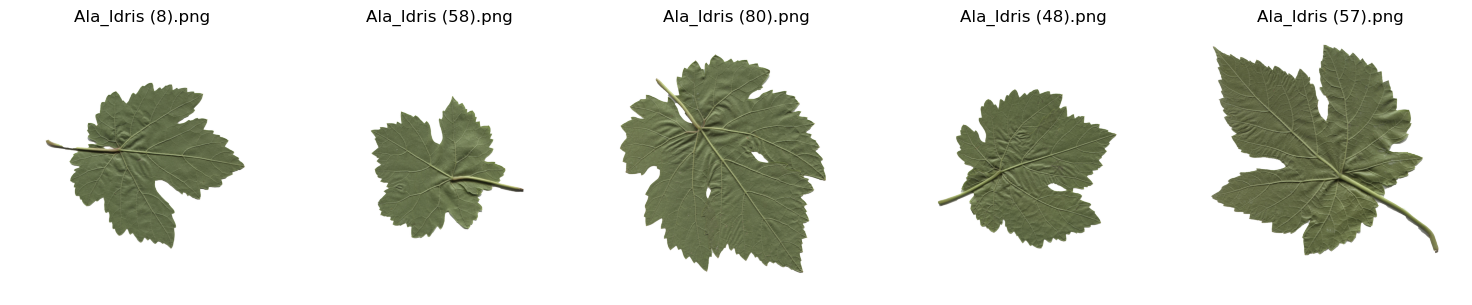

In [21]:
path_to_visualize = '/Users/akashzamnani/datasets/Grapevine_Leaves_Image_Dataset/Ala_Idris'

visualize_images(path=path_to_visualize)

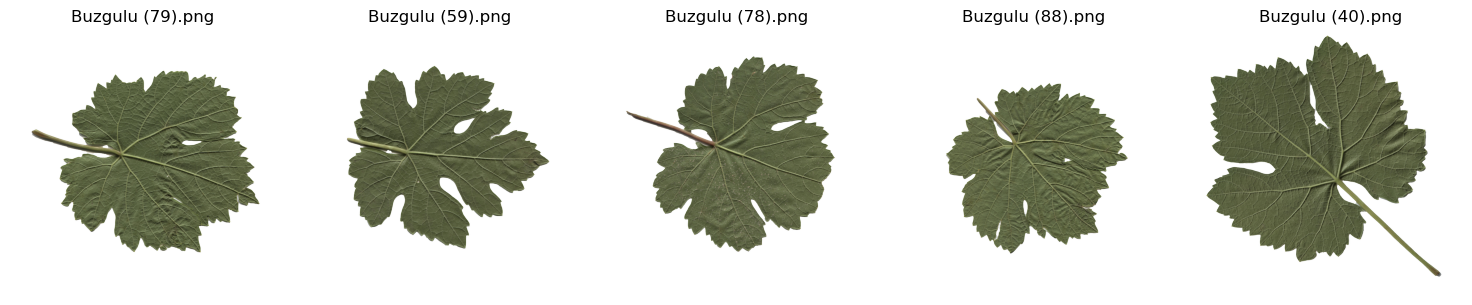

In [22]:
path_to_visualize = '/Users/akashzamnani/datasets/Grapevine_Leaves_Image_Dataset/Buzgulu'

visualize_images(path=path_to_visualize)

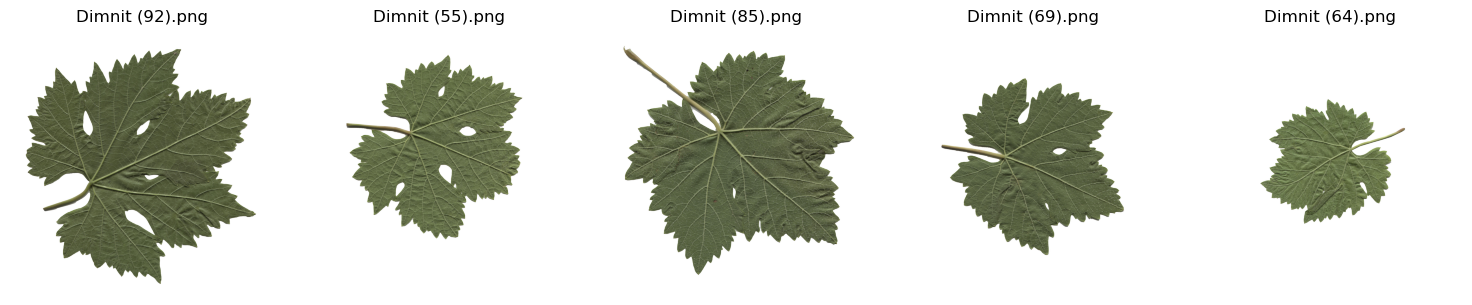

In [23]:
path_to_visualize = '/Users/akashzamnani/datasets/Grapevine_Leaves_Image_Dataset/Dimnit'

visualize_images(path=path_to_visualize)

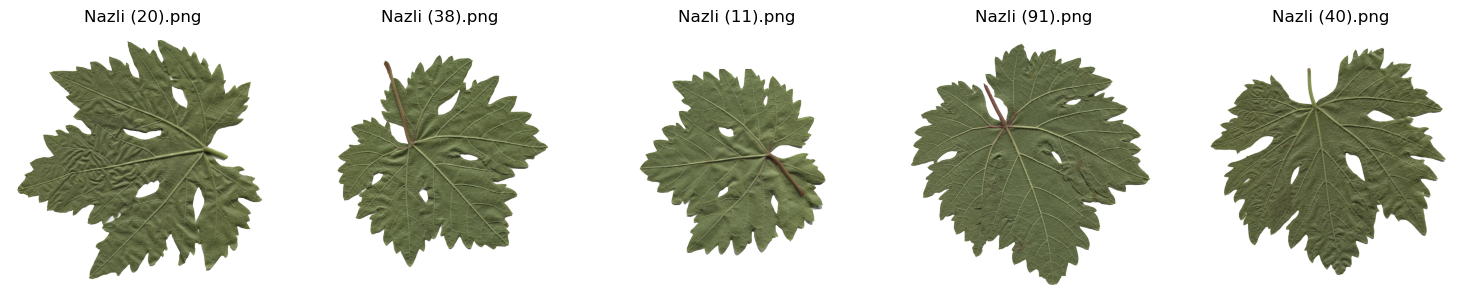

In [24]:
path_to_visualize = '/Users/akashzamnani/datasets/Grapevine_Leaves_Image_Dataset/Nazli'

visualize_images(path=path_to_visualize)

In [25]:
#base model 

In [26]:
DenseNet121_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='Avg'
)

# Freeze the pre-trained base model layers
DenseNet121_base.trainable = False

In [27]:
# Build the model
model = Sequential()

# Add the pre-trained DenseNet121_base 
model.add(DenseNet121_base)

# Batch Normalization
model.add(BatchNormalization(momentum=0.7, epsilon=1e-5))

#Dropout 
model.add(Dropout(0.45))

# Add a dense layer with 120 units and ReLU activation function
model.add(Dense(220, activation='relu'))

#Dropout 
model.add(Dropout(0.25))

# Add a dense layer with 120 units and ReLU activation function
model.add(Dense(120, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation function for binary classification
model.add(Dense(5, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ ?                      │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

In [30]:


history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


AttributeError: 'NoneType' object has no attribute 'items'